#### Target : Cluster data first, then predict duration depending in the cluster.

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


Matplotlib is building the font cache; this may take a moment.


In [57]:
sns.set_style('dark')

In [3]:
Init_train=pd.read_csv('train.csv')
Init_test=pd.read_csv('test.csv')
# not sure we can use test csv as Y is missing ==>cannot check++> will have to split the train file

In [4]:
Init_train.shape

(1458644, 11)

In [ ]:
# to_drop=['store_and_fwd_flag']
# Insight A creuser: vendor id, l organisation du taxi à new york
#weather_data_nyc_centralpark_2016
# 2 providers 

# WEATHER DATA

In [5]:
weather=pd.read_csv('weather_data_nyc_centralpark_2016(1).csv')

In [12]:
weather.isnull().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

In [7]:
weather.dtypes
# changer le type de la date de preicipitation et snow columns

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation           object
snow fall               object
snow depth              object
dtype: object

In [8]:
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [9]:
weather['maximum temperature'].unique()

array([42, 40, 45, 36, 29, 41, 46, 47, 59, 44, 30, 38, 51, 52, 31, 28, 37,
       27, 35, 39, 48, 56, 50, 22, 15, 54, 61, 55, 60, 67, 77, 79, 68, 62,
       57, 65, 63, 43, 71, 72, 53, 73, 58, 75, 82, 69, 66, 76, 80, 64, 70,
       78, 88, 90, 87, 92, 85, 83, 74, 84, 86, 91, 89, 81, 93, 94, 96, 95,
       49, 34, 33])

In [10]:
weather.date

0        1-1-2016
1        2-1-2016
2        3-1-2016
3        4-1-2016
4        5-1-2016
          ...    
361    27-12-2016
362    28-12-2016
363    29-12-2016
364    30-12-2016
365    31-12-2016
Name: date, Length: 366, dtype: object

In [11]:
#transform date from day-month-year to year-month-day in weather file
weather['date']=pd.to_datetime(weather.date)


In [36]:
# Day of year
weather['day_nb'] = weather.date.dt.dayofyear

In [12]:
#check if average temperature  is correct
((weather["maximum temperature"]+weather["minimum temperature"])/2==weather['average temperature']).sum()


366

In [ ]:
#weather['date'].map(lambda x :str(x)[:10])

# TAXI DATA

In [6]:
taxi=Init_train
taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [21]:
taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [88]:

taxi.pickup_datetime.unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-10 07:35:15',
       '2016-04-22 06:57:41', '2016-01-05 15:56:26'], dtype=object)

In [15]:
taxi['date']=pd.to_datetime(taxi['pickup_datetime'])

In [17]:
# Month of year
taxi['month'] = taxi['date'].dt.month
# Week of year
taxi['week_nb'] = taxi['date'].dt.week
# Day of week
taxi['weekday'] = taxi['date'].dt.weekday
# Day of year (quantieme)
taxi['day_nb'] = taxi['date'].dt.dayofyear
# Hour of the day 
taxi['hour'] = taxi['date'].dt.hour

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [20]:
# Timestamp.isocalendar todig in

In [82]:
#Select date part from date in taxi file
#taxi['date']=taxi['pickup_datetime'].map(lambda x :x[:10])

In [83]:
#taxi['date']=pd.to_datetime(taxi['date'])

In [84]:
# Select time in the pickup date time:
#taxi['time']=taxi['pickup_datetime'].map(lambda x :x[11:])
#taxi['hour']=taxi['pickup_datetime'].map(lambda x :x[11:13])

In [25]:
taxi['month'].unique()

array([3, 6, 1, 4, 5, 2])

In [30]:
# Month of the taxi "ride":
#taxi['Month']=taxi['pickup_datetime'].map(lambda x :x[5:7])
#Seasons:
dct_seasons={1:'winter',2:'winter',12:'winter', 3:'spring', 4: 'spring', 5:'spring', 6:'summer',7:'summer',8:'summer',9:'automn',10:'automn',11:'automn'}
taxi['season']=taxi['month'].map(dct_seasons)

In [31]:
taxi['season'].unique()

array(['spring', 'summer', 'winter'], dtype=object)

In [69]:
# check why automn is not visible ==>Only 1 semester of data

In [ ]:
# Check duration of the transport

In [121]:
taxi['ride_duration']=pd.to_datetime(taxi['dropoff_datetime'])-pd.to_datetime(taxi['pickup_datetime'])

# MERGING TABLES

In [37]:
df = taxi.merge(weather, how='left', on='day_nb')

In [40]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,hour,season,ride_duration,date_y,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,spring,0 days 00:07:35,2016-03-14,51,40,45.5,0.29,0.0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,summer,0 days 00:11:03,2016-06-12,46,37,41.5,0.35,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,winter,0 days 00:35:24,2016-01-19,28,16,22.0,0.00,0.0,T
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,spring,0 days 00:07:09,2016-04-06,83,66,74.5,0.40,0.0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,spring,0 days 00:07:15,2016-03-26,55,38,46.5,0.00,0.0,0


In [ ]:
#calculate distance in km (estimation with latitude and longitude)

In [51]:
df.dtypes

id                              object
vendor_id                        int64
pickup_datetime                 object
dropoff_datetime                object
passenger_count                  int64
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
store_and_fwd_flag              object
trip_duration                    int64
date_x                  datetime64[ns]
month                            int64
week_nb                          int64
weekday                          int64
day_nb                           int64
hour                             int64
season                          object
ride_duration          timedelta64[ns]
date_y                  datetime64[ns]
maximum temperature              int64
minimum temperature              int64
average temperature            float64
precipitation                   object
snow fall                       object
snow depth               

In [54]:
# Check if trip_duration is ok.
(df.trip_duration==df.ride_duration).sum()

1458644

In [41]:
df.passenger_count.value_counts()


1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [46]:
dct_passenger={1:1,2:2,3:3,4:4,5:5,6:6,0:np.NaN,7:np.NaN,9:np.NaN,8:np.NaN}

In [49]:
#We focus only on ride with at least 1 person, and rides with more than 6 people are too rare to be taken into account
df['new_passenger_count']=df.passenger_count.map(dct_passenger)

In [50]:
df.isnull().sum()

id                      0
vendor_id               0
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
date_x                  0
month                   0
week_nb                 0
weekday                 0
day_nb                  0
hour                    0
season                  0
ride_duration           0
date_y                  0
maximum temperature     0
minimum temperature     0
average temperature     0
precipitation           0
snow fall               0
snow depth              0
new_passenger_count    65
dtype: int64

In [70]:
# conversion from inch to mm.T set. arbitrary to a small number close to 0 but not 0

df['precipitation_mm']=df.precipitation.map(lambda x: float(x)*25.4 if x!='T'else 1e-5*25.4)

In [74]:
#df['precipitation_mm'].value_counts().sort_values()

In [73]:
#df.precipitation.value_counts().sort_values()

In [75]:
df['snow fall'].value_counts()

0.0     1063582
0        294364
T         52305
0.4       15975
0.2        8805
1.4        7373
2.5        7344
0.5        7248
27.3       1648
Name: snow fall, dtype: int64

In [85]:
df['snow_fall_mm']=df['snow fall'].map(lambda x: float(x)*25.4 if x!='T'else 1e-5*25.4)

In [80]:
df['snow depth'].value_counts()

0     1339426
T       46098
6       27615
4        7670
9        7571
1        7344
17       6941
2        6512
19       6084
22       3383
Name: snow depth, dtype: int64

In [83]:
df['snow_depth_mm']=df['snow depth'].map(lambda x: float(x)*25.4 if x!='T'else 1e-5*25.4)

In [152]:
#conversion from Fanrenheit degrees to Celsius degrees:(T(°F) - 32) × 5/9
df['average temperature_C']=df['average temperature'].map(lambda x: (x-32)*5/9)

In [178]:
df['average temperature_C'].value_counts()

 23.333333    39764
 23.611111    39431
 9.444444     39355
 23.888889    37321
 11.944444    35289
              ...  
 25.555556     7131
 5.277778      7112
 27.500000     7004
 25.833333     6372
-2.500000      3383
Name: average temperature_C, Length: 94, dtype: int64

In [153]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'date_x', 'month', 'week_nb', 'weekday', 'day_nb',
       'hour', 'season', 'ride_duration', 'date_y', 'maximum temperature',
       'minimum temperature', 'average temperature', 'precipitation',
       'snow fall', 'snow depth', 'new_passenger_count', 'precipitation_mm',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C'],
      dtype='object')

In [154]:
to_drop=['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime','store_and_fwd_flag','trip_duration','date_y','maximum temperature','minimum temperature', 'precipitation','snow fall','snow depth','average temperature']

In [123]:
df.trip_duration.value_counts().sort_values(ascending=False)


0 days 00:06:08    1624
0 days 00:06:48    1584
0 days 00:05:48    1582
0 days 00:06:07    1581
0 days 00:05:58    1577
                   ... 
0 days 23:39:22       1
0 days 07:31:04       1
0 days 01:45:23       1
0 days 23:05:00       1
0 days 23:49:58       1
Name: trip_duration, Length: 7417, dtype: int64

In [93]:
df[df.trip_duration>'0 days 02:00:00']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,new_passenger_count,precipitation_mm,snow_fall_mm,snow_depth_mm
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,...,61,39,50.0,0.00,0.0,0,3.0,0.000,0.000000,0.000000
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,...,86,69,77.5,0.66,0,0,1.0,16.764,0.000000,0.000000
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,...,91,75,83.0,0,0,0,6.0,0.000,0.000000,0.000000
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,...,74,65,69.5,0.22,0.0,0,2.0,5.588,0.000000,0.000000
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,...,22,6,14.0,0.00,0.0,0,1.0,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,N,...,43,32,37.5,0.07,T,0,2.0,1.778,0.000254,0.000000
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,...,79,68,73.5,0,0,0,3.0,0.000,0.000000,0.000000
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,...,87,72,79.5,0.05,0,0,1.0,1.270,0.000000,0.000000
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,...,50,38,44.0,0.00,0.0,T,6.0,0.000,0.000000,0.000254


In [94]:
#We will drop taxi ride above 2hours in a first time'
df[df.trip_duration>'0 days 02:00:00'].trip_duration.value_counts()

0 days 23:57:42    8
0 days 23:59:00    8
0 days 23:58:47    8
0 days 23:57:57    8
0 days 23:58:38    7
                  ..
0 days 23:07:58    1
0 days 03:35:26    1
0 days 23:08:22    1
0 days 20:42:04    1
0 days 04:20:17    1
Name: trip_duration, Length: 1500, dtype: int64

In [124]:
#We will drop taxi rides above 2hours in a first time'
taxi['ride_duration']=taxi['ride_duration'].map(lambda x : x if x<=datetime.timedelta(hours=2) else np.NaN)

In [126]:
df['ride_duration']=df['ride_duration'].map(lambda x : x if x<=datetime.timedelta(hours=2) else np.NaN)

In [127]:
df['ride_duration'].max()

Timedelta('0 days 01:59:51')

In [155]:
df.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
date_x                      0
month                       0
week_nb                     0
weekday                     0
day_nb                      0
hour                        0
season                      0
ride_duration            2253
date_y                      0
maximum temperature         0
minimum temperature         0
average temperature         0
precipitation               0
snow fall                   0
snow depth                  0
new_passenger_count        65
precipitation_mm            0
snow_fall_mm                0
snow_depth_mm               0
average temperature_C       0
dtype: int64

In [156]:
#drop all rows with missing values
df2=df.dropna()

In [157]:

df2['ride_duration_seconds']=df2['ride_duration'].map(lambda x:x.total_seconds())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='ride_duration_seconds'>

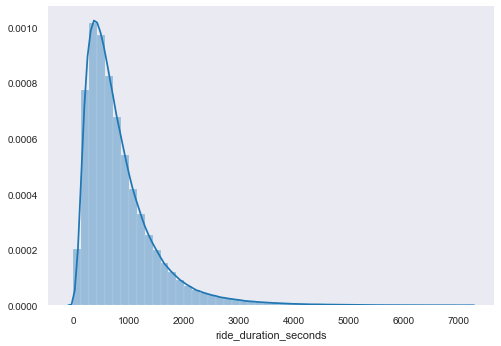

In [158]:
sns.distplot(df2['ride_duration_seconds'])
# duration is a log normal distribution

In [208]:
df2['ride_duration_seconds'].mean()/60
#Average ride is 13,9min is this sample
 #?? hypothesis testing? est-ce possible avec une distribution log normale

13.93498953188398

In [203]:
np.std(df2['ride_duration_seconds'])

654.2963878987725

In [205]:
df2.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,week_nb,weekday,...,minimum temperature,average temperature,new_passenger_count,precipitation_mm,snow_fall_mm,snow_depth_mm,average temperature_C,ride_duration_seconds,distance_KM,working_days
count,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1456327,1.456327e+06,1.456327e+06,1.456327e+06,...,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06,1.456327e+06
mean,1.534289e+00,1.663978e+00,-7.397350e+01,4.075093e+01,-7.397342e+01,4.075181e+01,0 days 00:13:56.099371913,3.516726e+00,1.383904e+01,3.049940e+00,...,4.673190e+01,5.424789e+01,1.663978e+00,2.248417e+00,1.487595e+00,1.032141e+01,1.235994e+01,8.360994e+02,3.438329e+00,7.147378e-01
std,4.988231e-01,1.313548e+00,7.090150e-02,3.285717e-02,7.064270e-02,3.588023e-02,0 days 00:10:54.296612538,1.681033e+00,8.563963e+00,1.954011e+00,...,1.571624e+01,1.614487e+01,1.313548e+00,5.935904e+00,2.386179e+01,5.704924e+01,8.969375e+00,6.542966e+02,4.285775e+00,4.515394e-01
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0 days 00:00:01,1.000000e+00,1.000000e+00,0.000000e+00,...,-1.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.388889e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073736e+01,-7.399133e+01,4.073589e+01,0 days 00:06:37,2.000000e+00,7.000000e+00,1.000000e+00,...,3.600000e+01,4.250000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.833333e+00,3.970000e+02,1.231748e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075411e+01,-7.397975e+01,4.075453e+01,0 days 00:11:01,4.000000e+00,1.300000e+01,3.000000e+00,...,4.600000e+01,5.350000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.194444e+01,6.610000e+02,2.093206e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076836e+01,-7.396302e+01,4.076981e+01,0 days 00:17:53,5.000000e+00,2.000000e+01,5.000000e+00,...,6.100000e+01,6.950000e+01,2.000000e+00,1.016000e+00,0.000000e+00,0.000000e+00,2.083333e+01,1.073000e+03,3.873726e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,0 days 01:59:51,6.000000e+00,5.300000e+01,6.000000e+00,...,7.500000e+01,8.300000e+01,6.000000e+00,5.867400e+01,6.934200e+02,5.588000e+02,2.833333e+01,7.191000e+03,1.240909e+03,1.000000e+00


In [161]:
df2.pickup_longitude .value_counts()

-73.982201    633
-73.982140    603
-73.982101    585
-73.982117    584
-73.982224    583
             ... 
-73.891502      1
-73.885712      1
-73.891273      1
-73.865181      1
-73.792320      1
Name: pickup_longitude, Length: 23018, dtype: int64

In [162]:
df2.pickup_latitude.value_counts()

40.774101    413
40.774120    410
40.774090    410
40.774109    392
40.774078    390
            ... 
40.661869      1
40.661961      1
40.661797      1
40.661804      1
40.694256      1
Name: pickup_latitude, Length: 45215, dtype: int64

In [165]:
df2.dropoff_longitude .value_counts()

-73.982330    443
-73.982094    433
-73.982246    430
-73.982117    425
-73.991379    420
             ... 
-73.830925      1
-73.830681      1
-73.830330      1
-73.830009      1
-73.895065      1
Name: dropoff_longitude, Length: 33783, dtype: int64

In [163]:
df2.dropoff_latitude.value_counts()

40.774311    269
40.774330    262
40.750149    259
40.750118    253
40.750198    249
            ... 
40.671432      1
40.610661      1
40.610809      1
40.671310      1
40.927067      1
Name: dropoff_latitude, Length: 62483, dtype: int64

In [167]:
#google is my friend
#Voici une version numpy vectorisée de la même fonction:

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km
#Les entrées sont toutes des tableaux de valeurs, et il devrait pouvoir faire des millions de points instantanément. L’exigence est que les entrées soient ndarrays mais les colonnes de votre table de pandas fonctionneront.

#Par exemple, avec des valeurs générées aléatoirement:

#La lecture en boucle dans des tableaux de données est très lente en python. Numpy fournit des fonctions qui fonctionnent sur des tableaux de données entiers, ce qui vous permet d'éviter les boucles et d'améliorer considérablement les performances.

#Ceci est un exemple de vectorisation .

In [151]:
distanceKM(40.7386,73.9804,40.7312,73.9995)

1.8080280500381358

In [174]:
df2['distance_KM']=haversine_np(df2['pickup_longitude'],df2['pickup_latitude'],df2['dropoff_longitude'],df2['dropoff_latitude'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
df2.shape

(1456327, 33)

In [175]:
df2['distance_KM'].value_counts()

0.000000     5884
0.000424      114
0.000424       53
0.000848       46
0.001273       40
             ... 
3.256370        1
0.442855        1
13.892659       1
3.833762        1
2.858381        1
Name: distance_KM, Length: 1449987, dtype: int64

<AxesSubplot:xlabel='distance_KM'>

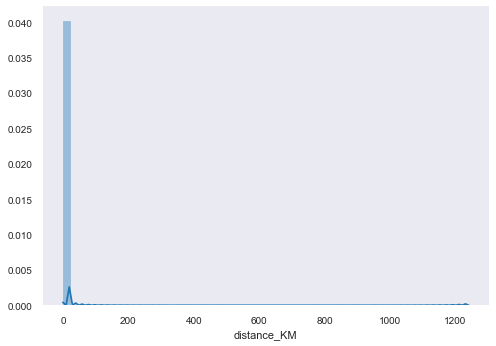

In [176]:
sns.distplot(df2['distance_KM'])
# Calcul distance à revoir. peut etre pas approprié avec de petites distances

In [183]:
dct_work={0:1,1:1,2:1,3:1,4:1,5:0,6:0}

In [185]:
df2['working_days']=df2.weekday.map(dct_work)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='working_days', ylabel='hour'>

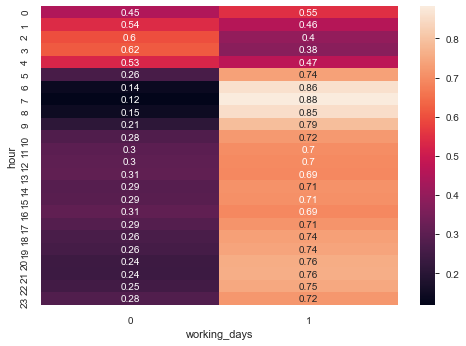

In [192]:
sns.heatmap(pd.crosstab(df2.hour,df2.working_days,normalize='index'),annot=True)

<AxesSubplot:xlabel='weekday', ylabel='hour'>

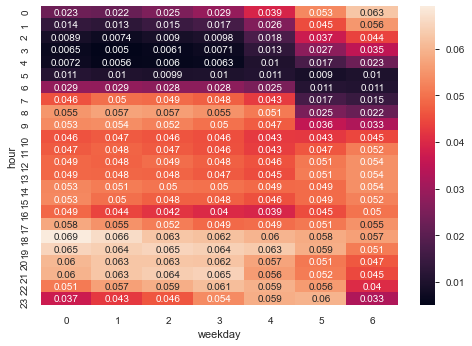

In [195]:
sns.heatmap(pd.crosstab(df2.hour,df2.weekday,normalize='columns'),annot=True)
#repartition des courses pour chaque jour 0 lundi, 6 dimanche

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

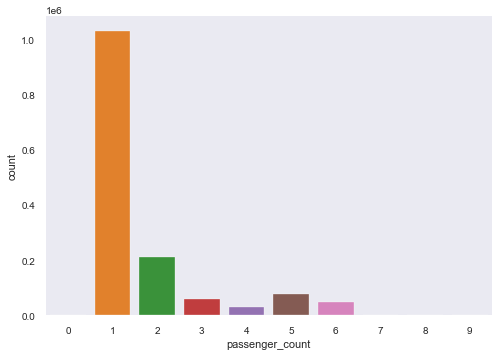

In [198]:
sns.countplot(df.passenger_count)
# majority of 1 passenger - ride

<AxesSubplot:xlabel='weekday', ylabel='passenger_count'>

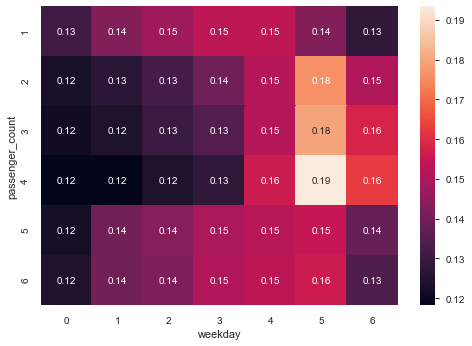

In [200]:
sns.heatmap(pd.crosstab(df.passenger_count,df2.weekday,normalize='index'),annot=True)
# sur quels jour sont plutot les passager solo, duo, ou plus

In [180]:
#modifier colonne à dropper
df3=df2.drop(to_drop, axis=1)

In [182]:
df3

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,date_x,month,week_nb,weekday,day_nb,hour,season,ride_duration,new_passenger_count,precipitation_mm,snow_fall_mm,snow_depth_mm,average temperature_C,ride_duration_seconds,distance_KM
0,1,-73.982155,40.767937,-73.964630,40.765602,2016-03-14 17:24:55,3,11,0,74,17,spring,0 days 00:07:35,1.0,7.366000,0.0,0.000000,7.500000,455.0,1.498521
1,1,-73.980415,40.738564,-73.999481,40.731152,2016-06-12 00:43:35,6,23,6,164,0,summer,0 days 00:11:03,1.0,8.890000,0.0,0.000000,5.277778,663.0,1.805507
2,1,-73.979027,40.763939,-74.005333,40.710087,2016-01-19 11:35:24,1,3,1,19,11,winter,0 days 00:35:24,1.0,0.000000,0.0,0.000254,-5.555556,2124.0,6.385098
3,1,-74.010040,40.719971,-74.012268,40.706718,2016-04-06 19:32:31,4,14,2,97,19,spring,0 days 00:07:09,1.0,10.160000,0.0,0.000000,23.611111,429.0,1.485498
4,1,-73.973053,40.793209,-73.972923,40.782520,2016-03-26 13:30:55,3,12,5,86,13,spring,0 days 00:07:15,1.0,0.000000,0.0,0.000000,8.055556,435.0,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,2016-04-08 13:31:04,4,14,4,99,13,spring,0 days 00:12:58,4.0,0.000000,0.0,0.000000,23.333333,778.0,1.225080
1458640,1,-74.000946,40.747379,-73.970184,40.796547,2016-01-10 07:35:15,1,1,6,10,7,winter,0 days 00:10:55,1.0,0.000000,0.0,0.000000,15.000000,655.0,6.049836
1458641,1,-73.959129,40.768799,-74.004433,40.707371,2016-04-22 06:57:41,4,16,4,113,6,spring,0 days 00:12:44,1.0,0.000254,0.0,0.000000,21.388889,764.0,7.824606
1458642,1,-73.982079,40.749062,-73.974632,40.757107,2016-01-05 15:56:26,1,1,1,5,15,winter,0 days 00:06:13,1.0,4.064000,0.0,0.000000,8.888889,373.0,1.092564


# Useful code

In [54]:
taxi.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,time,hour
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06,1458644,1458644,1458644
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN,182,86259,24
top,id3370968,NaN,2016-05-07 13:18:07,2016-05-16 19:40:28,NaN,NaN,NaN,NaN,NaN,N,NaN,2016-04-09 00:00:00,18:57:27,18
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN,9796,47,90600
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-30 00:00:00,NaN,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02,NaN,NaN,NaN
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02,NaN,NaN,NaN


In [35]:
#BasiC EDA 
from pandas_profiling import ProfileReport
#prof = ProfileReport(weather)
#prof.to_file(output_file='outputweather.html')